In [2]:
import random
n=20
V = [(random.uniform(5,75),random.uniform(5,55)) for i in range(n)]
import matplotlib.pyplot as plt
alpha=2

In [3]:
def t_cost(s,t): return ((s[0]-t[0])**2+(s[1]-t[1])**2)**(0.5)
def d_cost(s,t): return (1/alpha)*(((s[0]-t[0])**2+(s[1]-t[1])**2)**(0.5))

In [4]:
import itertools
import matplotlib.pyplot as plt
def two_opt(ps):
    n = len(ps)
    res = list(range(n))
    update = True
    while update:
        update = False
        for (i,j) in itertools.combinations(range(n),2):
            if ((t_cost(ps[res[i]],ps[res[i+1]])+t_cost(ps[res[j]],ps[res[(j+1)%n]]))>
                (t_cost(ps[res[i]],ps[res[j]])+t_cost(ps[res[i+1]],ps[res[(j+1)%n]]))):
                res[i+1:j+1] = res[j:i:-1]
                update = True
                
#     for i in range(n):
#         plt.scatter(ps[i][0],ps[i][1],c='k')
#         connect_x=[ps[res[i]][0],ps[res[(i+1)%len(ps)]][0]]
#         connect_y=[ps[res[i]][1],ps[res[(i+1)%len(ps)]][1]]
#         plt.plot(connect_x,connect_y, c='red')
    return res

In [5]:
def dp(ps):
    length = {} # length[(u,S)]: u を始点とし S の点すべてを回る最小経路長、ディクショナリ
    route = {} # route[(u,S)]: 最小経路長を達成するためのルート、ディクショナリ
    v = ps[0]
    n = len(ps)
    for i in range(1,n+1):
        for a in itertools.combinations(range(n),i):
            S = frozenset(a)
            for j in S:
                u = ps[j]
                if i==1:
                    length[(j,S)] = t_cost(v,u)
                    route[(j,S)] = [j]
                else:
                    Sj = S-set([j]) # S から j を除いたもの
                    k=min(Sj,key=lambda k: length[(k,Sj)]+t_cost(ps[k],u))#Sjの中でlength[(k,Sj)]+dist(ps[k],u)が最小のものを返している
                    length[(j,S)] = length[(k,Sj)]+t_cost(ps[k],u)
                    route[(j,S)] = route[(k,Sj)]+[j]
    return route[(0,frozenset(range(n)))] 

In [6]:
two_opt(V)

[0, 2, 7, 15, 4, 5, 13, 16, 3, 9, 1, 17, 18, 14, 11, 6, 19, 8, 12, 10]

In [7]:
dp(V)

KeyboardInterrupt: 

In [ ]:
import itertools
import matplotlib.pyplot as plt
def heuristic1(tsp):
    label={}
    operation={}
    flyop={}
    driveop={}
    tsptotal=0
    for i in tsp:
        label[i]='simple'
        tsptotal=tsptotal+t_cost(V[tsp[i]],V[tsp[(i+1)%len(tsp)]])
    n=len(label)
    tspdtotal=tsptotal
    ms=[1]
    while max(ms)>0:
        ms=[]
        for i in range(n):
            if label[tsp[i]]=='combined' or label[tsp[i]]=='drone' or label[tsp[i]]=='truck':
                ms.append(-float('inf'))
            else:
                mfsi=t_cost(V[tsp[i-1]],V[tsp[i]])+t_cost(V[tsp[i]],V[tsp[(i+1)%n]])-max(d_cost(V[tsp[i-1]],V[tsp[i]])+d_cost(V[tsp[i]],V[tsp[(i+1)%n]]),t_cost(V[tsp[i-1]],V[tsp[(i+1)%n]]))
                ms.append(mfsi)
        for i in range(n):
            if label[tsp[i]]=='combined':
                if label[tsp[i-1]]==('combined'or'simple'):
                    j=i+1
                    while label[tsp[j%n]]!='combined':
                        if label[tsp[j%n]]=='drone':
                            dronenode=j%n
                        if label[tsp[(j+1)%n]]=='combined':
                            pls=t_cost(V[tsp[i-1]],V[tsp[i]])+operation[(tsp[dronenode],tsp[i],tsp[(j+1)%n])]-max(d_cost(V[tsp[i-1]],V[tsp[dronenode]])+d_cost(V[tsp[dronenode]],V[tsp[(j+1)%n]]),driveop[(tsp[dronenode],tsp[i],tsp[(j+1)%n])]+t_cost(V[tsp[i-1]],V[tsp[i]]))
                            ms.append(pls)
                            break
                        j=j+1  
                else: ms.append(-float('inf'))
            else: ms.append(-float('inf'))
        for i in range(n):
            if label[tsp[i]]=='combined':
                if label[tsp[(i+1)%n]]==('combined'or'simple'):
                    j=i-1
                    while label[tsp[(j+n)%n]]!='combined':
                        if label[tsp[(j+n)%n]]=='drone':
                            dronenode=(j+n)%n
                        if label[tsp[j-1]]=='combined':
                            pls=t_cost(V[tsp[i]],V[tsp[(i+1)%n]])+operation[(tsp[dronenode],tsp[j-1],tsp[i])]-max(d_cost(V[tsp[j-1]],V[tsp[dronenode]])+d_cost(V[tsp[dronenode]],V[tsp[(i+1)%n]]),driveop[(tsp[dronenode],tsp[j-1],tsp[i])]+t_cost(V[tsp[i]],V[tsp[(i+1)%n]]))
                            ms.append(pls)
                            break
                        j=j-1  
                else: ms.append(-float('inf'))
            else: ms.append(-float('inf'))
        for i in range(len(ms)):
            if ms[i]==max(ms) and ms[i]>0:
                tspdtotal=tspdtotal-ms[i]
                if i//n==0:
                    label[tsp[i]]='drone'
                    label[tsp[i-1]]='combined'
                    label[tsp[(i+1)%n]]='combined'
                    flyop[(tsp[i],tsp[i-1],tsp[(i+1)%n])]=d_cost(V[tsp[i-1]],V[tsp[i]])+d_cost(V[tsp[i]],V[tsp[(i+1)%n]])
                    driveop[(tsp[i],tsp[i-1],tsp[(i+1)%n])]=t_cost(V[tsp[i-1]],V[tsp[(i+1)%n]])
                    operation[(tsp[i],tsp[i-1],tsp[(i+1)%n])]=max(flyop[(tsp[i],tsp[i-1],tsp[(i+1)%n])],driveop[(tsp[i],tsp[i-1],tsp[(i+1)%n])])
                elif i//n==1:
                    label[tsp[i%n]]='truck'
                    label[tsp[(i-1)%n]]='combined'
                    j=(i+1)%n
                    while label[tsp[j%n]]!='combined':
                        if label[tsp[j%n]]=='drone':
                            dronenode=j
                        if label[tsp[(j+1)%n]]=='combined':
                            flyop[(tsp[dronenode],tsp[(i-1)%n],tsp[(j+1)%n])]=d_cost(V[tsp[(i-1)%n]],V[tsp[dronenode]])+d_cost(V[tsp[dronenode]],V[tsp[(j+1)%n]])
                            driveop[(tsp[dronenode],tsp[(i-1)%n],tsp[(j+1)%n])]=driveop[(tsp[dronenode],tsp[i%n],tsp[(j+1)%n])]+t_cost(V[tsp[(i-1)%n]],V[tsp[i%n]])
                            operation[(tsp[dronenode],tsp[(i-1)%n],tsp[(j+1)%n])]=max(flyop[(tsp[dronenode],tsp[(i-1)%n],tsp[(j+1)%n])],driveop[(tsp[dronenode],tsp[(i-1)%n],tsp[(j+1)%n])])
                            break
                        j=j+1
                elif i//n==2:
                    label[tsp[i%n]]='truck'
                    label[tsp[(i+1)%n]]='combined'
                    j=(i-1)%n
                    while label[tsp[j]]!='combined':
                        if label[tsp[j]]=='drone':
                            dronenode=j
                        if label[tsp[j-1]]=='combined':
                            flyop[(tsp[dronenode],tsp[j-1],tsp[(i+1)%n])]=d_cost(V[tsp[j-1]],V[tsp[dronenode]])+d_cost(V[tsp[dronenode]],V[tsp[(i+1)%n]])
                            driveop[(tsp[dronenode],tsp[j-1],tsp[(i+1)%n])]=driveop[(tsp[dronenode],tsp[j-1],tsp[i%n])]+t_cost(V[tsp[i%n]],V[tsp[(i+1)%n]])
                            operation[(tsp[dronenode],tsp[j-1],tsp[(i+1)%n])]=max(flyop[(tsp[dronenode],tsp[j-1],tsp[(i+1)%n])],driveop[(tsp[dronenode],tsp[j-1],tsp[(i+1)%n])])
                            break
                        j=j-1
#     for i in range(n):
#         plt.scatter(V[tsp[i]][0],V[tsp[i]][1],c='k')
#         if label[tsp[i]]=='combined':
#             j=(i+1)%n
#             truck=[]
#             while label[tsp[j]]!='combined':
#                 if label[tsp[j]]=='drone':
#                     dronenode=j
#                 if label[tsp[j]]=='truck':
#                     truck.append(j)
#                 if label[tsp[(j+1)%n]]=='combined':
#                     plt.plot([V[tsp[i]][0],V[tsp[dronenode]][0]],[V[tsp[i]][1],V[tsp[dronenode]][1]],c='blue')
#                     plt.plot([V[tsp[(j+1)%n]][0],V[tsp[dronenode]][0]],[V[tsp[(j+1)%n]][1],V[tsp[dronenode]][1]],c='blue')
#                     if len(truck)==0:
#                         plt.plot([V[tsp[(j+1)%n]][0],V[tsp[i]][0]],[V[tsp[(j+1)%n]][1],V[tsp[i]][1]],c='red')
#                     else:
#                         plt.plot([V[tsp[i]][0],V[tsp[truck[0]]][0]],[V[tsp[i]][1],V[tsp[truck[0]]][1]],c='red')
#                         plt.plot([V[tsp[(j+1)%n]][0],V[tsp[truck[-1]]][0]],[V[tsp[(j+1)%n]][1],V[tsp[truck[-1]]][1]],c='red')
#                         for k in range(0,len(truck)-1):
#                             plt.plot([V[truck[k]][0],V[truck[k+1]][0]],[V[truck[k]][1],V[truck[k+1]][1]],c='red')
#                         truck=[]
#                     break
#                 j=(j+1)%n
#             if label[tsp[j]]=='combined':
#                 plt.plot([V[tsp[j]][0],V[tsp[i]][0]],[V[tsp[j]][1],V[tsp[i]][1]],c='red')
                    
            
            
    return tspdtotal
            


In [1]:
heuristic1(two_opt(V))

NameError: name 'heuristic1' is not defined

In [12]:
import itertools
def twopmove(lis,i,j):#iとjの順番を入れ替える
    i0,j0=lis[i],lis[j]
    lis[j]=i0
    lis[i]=j0
    return lis
         
def twooptmove(lis,i,j):#2辺を入れ替える
    if i<j: lis=lis[:i+1]+lis[j:(i+1)%len(lis)-1:-1]+lis[(j+1):]
    else: lis=[lis[i]]+lis[j::-1]+lis[:(i+1)%len(lis)-1:-1]+lis[j+1:i]
        
    return lis

def onepmove(lis,i,j):#iをj番目に挿入する
    i0=lis[i]
    del lis[i]
    lis.insert(j,i0)
       
    return lis
    

In [13]:
def improve_two_p(lis):
    n=len(lis)
    update=True
    while update:
        update=False
        f=heuristic1(lis)
        for (i,j) in itertools.combinations(range(n),2):
            twopmove(lis,i,j)
            if f>heuristic1(lis):
                update=True
                f=heuristic1(lis)
                break
            else:
                twopmove(lis,i,j)        
                
    return lis,heuristic1(lis)

def improve_two_opt(lis):
    n=len(lis)
    update=True
    while update:
        update=False
        for (i,j) in itertools.combinations(range(n),2):
            R=twooptmove(lis,i,j)
            if heuristic1(lis)>heuristic1(R):
                update=True
                lis=R
                break
            else:
                R=twooptmove(lis,i,j)        
                
    return lis,heuristic1(lis)

def improve_one_p(lis):
    n=len(lis)
    update=True
    while update:
        update=False
        f=heuristic1(lis)
        for (i,j) in itertools.combinations(range(n),2):
            twopmove(lis,i,j)
            if f>heuristic1(lis):
                update=True
                f=heuristic1(lis)
                break
            else:
                twopmove(lis,j,i)        
                
    return lis,heuristic1(lis)

def improve_all_greedy(lis):
    lis_all=[improve_two_p(lis)[1],improve_two_opt(lis)[1],improve_one_p(lis)[1]]
    lis_All=[improve_two_p(lis),improve_two_opt(lis),improve_one_p(lis)]
    for i in lis_All:
        if i[1] == min(lis_all):
            return i
            break
    
    

In [14]:
lis=two_opt(V)

In [15]:
lis

[0, 3, 5, 4, 1, 2]

In [16]:
heuristic1(lis)

84.0234079938713

In [17]:
# improve_two_p(lis)

In [18]:
# improve_two_opt(lis)

In [19]:
# improve_one_p(lis)

In [20]:
improve_all(lis)

([4, 5, 3, 0, 1, 2], 65.13210162931928)

In [19]:
testlis=improve_all(lis)[0]

109.53782078553178

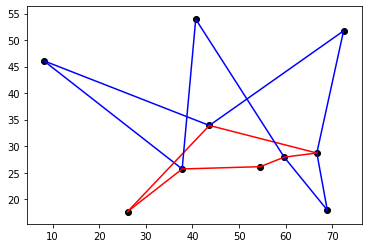

In [22]:
heuristic1(testlis)